## ANLY - 590 assignment 1 
### Jen Wang

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
import os

## 1. Regularization
### 1.1 LASSO

In [2]:
os.chdir("/Users/james/Desktop")

In [3]:
data = pd.read_csv('Hitters.csv')
data = data.dropna()

In [4]:
y = data.Salary
x = data.drop(['Unnamed: 0','Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

In [5]:
alphas = 10**np.linspace(6,-2,50)*0.5
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(x, y)
    coefs.append(lasso.coef_)
    

In [6]:
lasso.set_params(alpha=10)
lasso.fit(x, y)
pd.Series(lasso.coef_, index=x.columns)

AtBat      0.000000
Hits       0.329475
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      0.000000
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.076322
CRBI       0.204475
CWalks     0.000000
PutOuts    0.000000
Assists    0.000000
Errors     0.000000
dtype: float64

The final three predictors that remain in the model are 'Hits', 'CRuns' and 'CRBI'.

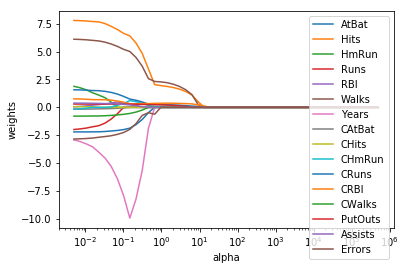

In [13]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
ax.legend(x.columns,loc = 'best')

In [60]:
X_train, X_test , y_train, y_test = model_selection.train_test_split(x, y, test_size=0.5, random_state=1)
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
print("Alpha=", lassocv.alpha_)
print("best model coefficients:")
pd.Series(lasso.coef_, index=x.columns)

Alpha= 2.2410206769492604
best model coefficients:


AtBat      0.000000
Hits       0.329475
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      0.000000
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.076322
CRBI       0.204475
CWalks     0.000000
PutOuts    0.000000
Assists    0.000000
Errors     0.000000
dtype: float64

There are six predictors left in the model.

### 1.2 Ridge 

In [32]:
ridge = Ridge(max_iter=10000, normalize=True)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(x, y)
    coefs.append(ridge.coef_)
    

(50, 16)

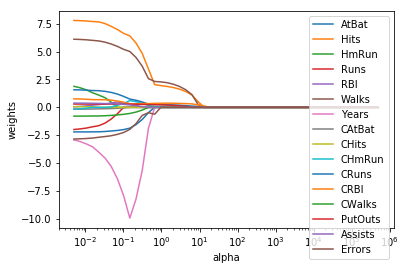

In [12]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
ax.legend(x.columns,loc = 'best')

In [63]:
ridgecv = RidgeCV(alphas=alphas, normalize=True)
ridgecv.fit(X_train, y_train)
print("Alpha=", ridgecv.alpha_)
ridge6 = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge6.fit(X_train, y_train)
print("best model coefficients:")
pd.Series(ridge6.coef_, index=x.columns)

Alpha= 0.45514908899576134
best model coefficients:


AtBat     -0.082267
Hits       0.907200
HmRun     -0.696198
Runs       0.662168
RBI        1.579597
Walks      2.133570
Years     -0.012852
CAtBat     0.005406
CHits      0.053947
CHmRun     0.544505
CRuns      0.112042
CRBI       0.135625
CWalks     0.097948
PutOuts    0.321575
Assists    0.017361
Errors     0.095642
dtype: float64

## 2. Short Answer

I think bias-variance tradeoff is just like overfitting vs. underfitting. And the regularization is trying to reduce the overfitting problem, since regularization adds a penalty to constrain the coefficient. 
To describe the bias-varaince tradeoff from the plot above, according to the trajectories, we can say that when the alpha tends to be small, there is a low regularization weight have high variance and low bias. However, ton the right side of the plot, the penalty constrains the models with low variance models thay  has a much lower range of coefficients.